In [1]:
from torchvision.models.segmentation import deeplabv3_resnet50

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F

In [2]:
plt.rcParams["savefig.bbox"] = 'tight'

In [3]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

model = deeplabv3_resnet50(pretrained=True, progress=False)
model = model.eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


In [4]:
from pathlib import Path
from torchvision.utils import make_grid
from torchvision.io import read_image

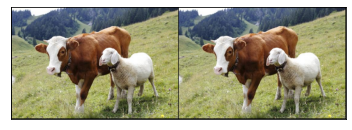

In [6]:
model_1_int = read_image(str(Path('assets_1') / 'model_4.jpg'))

grid = make_grid([model_1_int, model_1_int])
show(grid)

from torchvision.transforms.functional import convert_image_dtype

In [7]:
batch_int = torch.stack([model_1_int])
batch = convert_image_dtype(batch_int, dtype=torch.float)

normalized_batch = F.normalize(batch, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
output = model(normalized_batch)['out']

output = model(normalized_batch)['out']

In [8]:
print(output.shape, output.min().item(), output.max().item())

torch.Size([1, 21, 367, 550]) -3.8702290058135986 14.683502197265625


In [9]:
sem_classes = [
    '__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]

In [10]:
sem_class_to_idx = {cls: idx for (idx, cls) in enumerate(sem_classes)}

normalized_masks = torch.nn.functional.softmax(output, dim=1)

In [12]:
dog_and_boat_masks = [
    normalized_masks[img_idx, sem_class_to_idx[cls]]
    for img_idx in range(batch.shape[0])
    for cls in ('sheep', 'cow')
]

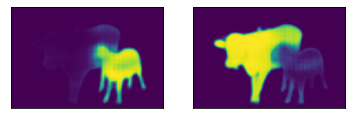

In [13]:
show(dog_and_boat_masks)